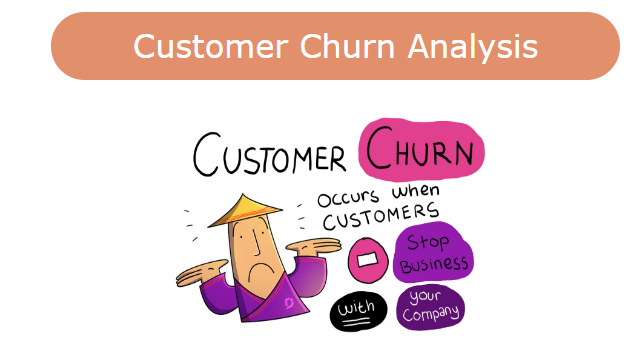

In [1]:
from IPython.display import Image
Image(filename='first.png') 

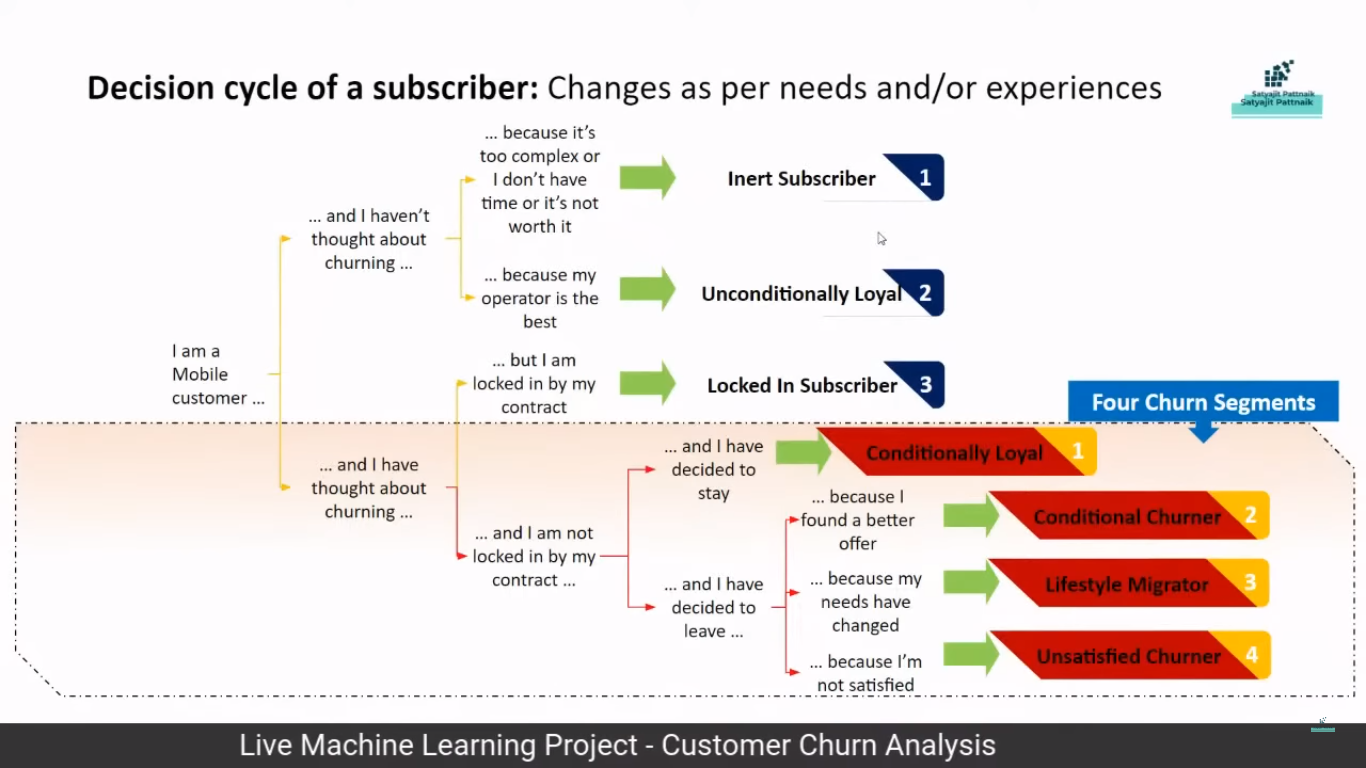

In [2]:
from IPython.display import Image
Image(filename='sec.png') 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("data/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Data Review and Cleaning

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

<u>Notice</u>: Total Charges column has a object data type but it is numerical data, so let's change data type for this column

In [6]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [7]:
# Get the number of columns of each data type
print(f"""Number of:

float features: {len(df.select_dtypes('float').columns)}
int features: {len(df.select_dtypes('int').columns)}
object features: {len(df.select_dtypes('object').columns)}
""") 

Number of:

float features: 4
int features: 6
object features: 23



In [8]:
df_na = (df.isnull().sum())/len(df)
df_na = df_na.drop(df_na[df_na==0].index).sort_values(ascending=False)
miss_data = pd.DataFrame({"percentage_of_null ":df_na.map('{:.2%}'.format), "no_of_nulls ":df[df_na.index].isna().sum()})
miss_data

,percentage_of_null,no_of_nulls
Churn Reason,73.46%,5174
Total Charges,0.16%,11


- Churn Reason column
- About 73%(5174) of Churn Reason column is missing data, But why?

In [9]:
df['Churn Label'].value_counts(normalize=True)

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

- You can see about 73% of customers have a Churn Label = No, so they don't need to have some Churn Reason.
- We will drop this column becouse a general rule is that, if more than half of the data in a column is missing, it's better to drop.

Total Charges column

In [10]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


we have the number of months that the customer uses the service, Tenure Months, and Monthly Charges. we can replace null values with those calculated by  (monthly charges * tenure months)

In [11]:
df['Total Charges'].fillna(df['Monthly Charges']*df['Tenure Months'], inplace=True)

# The problem of Low and High Cardinality

In [12]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

- <u>Low cordinality/Constant Column</u>: A column that has the same value for every row in a dataset is often considered uninformative and can be a problem in data analysis or machine learning, as it doesn't provide any information.
- <u>High Cardinality</u>: When each row in a dataset has a unique value. High cardinality features can present challenges for modeling, as they can lead to a large number of unique categories, which can make the data more difficult to work with.

The data has many constant features and columns with high cardinality problem.

<u>Low cordinality columns</u>:Count column, Country column, State column.

<u>High cordinality columns</u>:CustomerID column, Zip Code column.

In [13]:
df.groupby(['Country','State']).size()

Country        State     
United States  California    7043
dtype: int64

<u>All of our customers are from the United States of America, California.</u>

## Data Visualization

In [14]:
churn_label_counts = df['Churn Label'].value_counts()
fig = px.pie(names=churn_label_counts.keys(), values=churn_label_counts.values, title="Churn Label Distribution")
fig.show()

- 26.5% of customers have stopped using our service, Our task is to know which type of customers are more likely to stop using our service and what actions we can take

In [15]:
values = df['Churn Reason'].value_counts(ascending=False).values
keys = df['Churn Reason'].value_counts(ascending=False).keys()

fig1 = px.bar(x=keys, y=values, text=values, color=values)
fig1.update_layout(xaxis_title="Count", yaxis_title="Churn Reason")
fig1.show()

The graph shows that churn reasons can be divided into two main categories:

<u>internal reasons:</u>- within the company's control, such as **product quality**, **service quality**, and **price**..

<u>external reasons:</u>- outside of the company's control, such as **competitor offerings** and **network reliability.**

<u>Actions that should to take :</u>-

- improving **product** , **service quality**, and **reducing prices**, in order to address the top three churn reasons.
- improve **customer support**, as this is major churn driver.
- The company should monitor **competitor offerings** and **network reliability**, and **make adjustments as needed**.

### City

In [16]:
df['City'].nunique()

1129

There are 1129 unique cities in dataset.

In [17]:
# Group by 'City' and 'Churn Label' and count the occurrences
grouped = df.groupby(['City', 'Churn Label'])['CustomerID'].count()
total_sums = grouped.groupby('City').transform('sum')
churn_rate = round(grouped/total_sums, 2)
city_churnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count per city
city_counts = df.groupby('City')['CustomerID'].count().reset_index()
city_counts.rename(columns={'CustomerID':'counts'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
City_ChurnLabel = city_churnLabel.merge(city_counts, on='City')

# Filter out the rows where 'Churn Label' is 'No' and sort dataframe by count
City_ChurnLabel = City_ChurnLabel[City_ChurnLabel['Churn Label'] == 'Yes']
City_ChurnLabel = City_ChurnLabel.sort_values(by='counts', ascending=False)
City_ChurnLabel.drop(columns='Churn Label', inplace=True)

City_ChurnLabel.head()

,City,churn_rate,counts
976,Los Angeles,0.30,305
1502,San Diego,0.33,150
1518,San Jose,0.26,112
1479,Sacramento,0.24,108
1508,San Francisco,0.30,104


In [18]:
fig2 = px.bar(City_ChurnLabel.head(20), x='City', y='counts', title='City Counts', text='counts')
fig2.update_layout(xaxis_title="Name of city", yaxis_title="Count")
fig2.show()

We see the largest number of customers in the Los Angeles counted 305, then San Diego counted 150.

In [19]:
fig3 = px.bar(City_ChurnLabel.sort_values(by='churn_rate', ascending=True).head(30),
              x='City', y='churn_rate', title='Churn Rate by City', text='churn_rate', color='churn_rate')
fig3.update_layout(xaxis_title="Name of city",
                    yaxis_title="churn rate")
fig3.show()

In [20]:
fig = px.bar(City_ChurnLabel.sort_values(by='churn_rate', ascending=False).head(30),
             x='City', y= 'churn_rate', title='Churn Rate by City', text ='churn_rate', color='churn_rate')
fig.update_layout(
    xaxis_title="Name of city",
    yaxis_title="churn rate"
)
fig.show()

There are 12 city have no churned costumers

In [21]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

### Latitude and Longitude

In [22]:
# Group by Latitude', 'Longitude' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Latitude','Longitude', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby(['Latitude','Longitude']).transform('sum')
churn_rate = round(grouped / total_counts, 2)
loc_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count 
loc_counts = df.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index()
loc_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
loc_ChurnLabel = loc_ChurnLabel.merge(loc_counts, on=['Latitude','Longitude'])

# Filter out the rows where 'Churn Label' is 'No' and sort dataframe by count
loc_ChurnLabel = loc_ChurnLabel[loc_ChurnLabel['Churn Label'] == 'Yes']
loc_ChurnLabel = loc_ChurnLabel.sort_values(by='count', ascending=False)
loc_ChurnLabel.drop(columns='Churn Label', inplace=True)

loc_ChurnLabel.head()

,Latitude,Longitude,churn_rate,count
1,32.555828,-117.040073,0.2,5
672,34.038983,-117.991372,0.6,5
698,34.050198,-118.210946,0.2,5
696,34.049841,-118.338460,0.2,5
690,34.048013,-118.293953,0.2,5


In [23]:
# data hover on count
fig4 = px.scatter_mapbox(loc_ChurnLabel,
                        lat="Latitude", lon='Longitude',
                        hover_data= ['count'], mapbox_style='open-street-map',
                        color="count"
        )
fig4.show()

In [24]:
# data hover on churn_rate
fig = px.scatter_mapbox(loc_ChurnLabel,
                        lat="Latitude", lon='Longitude',
                        hover_data= ['churn_rate'], mapbox_style='open-street-map',
                        color="churn_rate"
        )
fig.show()

### Tenure Months

In [25]:
fig5 = px.histogram(df, x="Tenure Months", color="Churn Label" )
fig5.show()

- The number of clients in the churn ceases to decline sharply after 5 months in the service

In [26]:
Tenure_Months=df.groupby('Churn Label')['Tenure Months'].quantile([0.5, 0.75, 0.9, 0.95]).reset_index()
Tenure_Months['level_1']=Tenure_Months['level_1'].astype(str)

fig6 = px.bar(Tenure_Months, x='level_1', y= 'Tenure Months',
             color= 'Churn Label', barmode="group", text = 'Tenure Months' )

fig6.update_xaxes(title="Quantiles")
fig6.show()

- 50% of the customers who left the service did so in the first 10 months.

Contract type

In [27]:
Contract_Label_counts= df['Contract'].value_counts()
fig7 = px.pie(names= Contract_Label_counts.keys(), values= Contract_Label_counts.values, title='Contract Distribution')
fig7.show()

In [28]:
# Group by 'Contract' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Contract', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Contract').transform('sum')
normalized_count = round(grouped / total_counts,2)
Contract_ChurnLabel = pd.DataFrame({'normalized_count': normalized_count}).reset_index()

Contract_ChurnLabel

,Contract,Churn Label,normalized_count
0,Month-to-month,No,0.57
1,Month-to-month,Yes,0.43
2,One year,No,0.89
3,One year,Yes,0.11
4,Two year,No,0.97
5,Two year,Yes,0.03


In [29]:
fig8 = px.bar(Contract_ChurnLabel, x='normalized_count', y='Contract', color='Churn Label',
             title='100% Stacked Bar Chart by Contract and Churn Label', text= 'normalized_count',
             labels={'normalized_count': 'Percentage'})

fig8.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig8.show()

- <u>Churn rate</u> is highest for <u>month-to-month contracts</u> at 43% that's mean <u>43% of customers who had a Month-to-month contract type left the service</u>. The churn rate is lower for <u>one-year contracts</u>, at <u>11%</u>, and even lower for <u>two-year contracts</u>, at <u>3%</u>

In [30]:
fig9 = px.pie(df.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
            names='Contract',
            facet_col = 'Churn Label',
            title = 'Churn rate by contract type')
            
fig9.show()

- <u>88.7%</u> of customers who left the service had a <u>Month-to-month contract</u> type and only <u>2.57%</u> of customers who left the service had a <u>two-year contract</u>

### Gender

In [31]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

Gender distribution seems balanced between males and females

In [32]:
# Group by 'Contract' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Gender', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Gender').transform('sum')
normalized_count = round(grouped / total_counts,2)
Gender_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

Gender_ChurnLabel

,Gender,Churn Label,rate
0,Female,No,0.73
1,Female,Yes,0.27
2,Male,No,0.74
3,Male,Yes,0.26


In [33]:
fig10 = px.bar(Gender_ChurnLabel, x='rate', y='Gender', color='Churn Label',
             title='100% Stacked Bar Chart by Contract and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig10.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig10.show()

We don't see much difference. That's mean the Gender of customer don't related with churn label

### Payment Method

In [34]:
df['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [35]:
Payment_Method_counts= df['Payment Method'].value_counts()
fig11 = px.pie(names= Payment_Method_counts.keys(), values= Payment_Method_counts.values, title='Payment Method Distribution')
fig11.show()

- Most of customers use electronic check as a payment method about 33.6%

In [36]:
# Group by 'Contract' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Payment Method', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Payment Method').transform('sum')
normalized_count = round(grouped / total_counts,2)
Payment_Method_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

fig12 = px.bar(Payment_Method_ChurnLabel, x='rate', y='Payment Method', color='Churn Label',
             title='100% Stacked Bar Chart by Payment Method and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig12.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig12.show()

- It looks like for customers with an electronic check as a payment method with 45% churn rate. Credit card payment method has the least churn rate about 15%

### Internet Service

In [37]:
df['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [38]:
# Group by 'Internet Service' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Internet Service', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Internet Service').transform('sum')
normalized_count = round(grouped / total_counts,2)
Internet_Service_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

fig13 = px.bar(Internet_Service_ChurnLabel, x='rate', y='Internet Service', color='Churn Label',
             title='100% Stacked Bar Chart by Internet Service and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig13.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig13.show()


- Customers with optical fiber Internet have the highest churn rate about 42% and the least churn rate by clients with no internet service about 7%

### Payment Method and Internet Service


In [39]:
# Group by 'Payment Method','Internet Service' and 'Churn Label' and count the occurrences
grouped = df.groupby(['Payment Method','Internet Service', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby(['Payment Method','Internet Service']).transform('sum')
churn_rate = round(grouped / total_counts, 2)
Payment_InternetService_ChurnLabel = pd.DataFrame({'churn_rate': churn_rate}).reset_index()

# Create a DataFrame with the total count per city
Payment_InternetService_counts = df.groupby(['Payment Method','Internet Service'])['CustomerID'].count().reset_index()
Payment_InternetService_counts.rename(columns={'CustomerID': 'count'}, inplace=True)

# Merge the City_ChurnLabel and city_counts DataFrames
Payment_InternetService_ChurnLabel = Payment_InternetService_ChurnLabel.merge(Payment_InternetService_counts, on=['Payment Method','Internet Service'])

# Filter out the rows where 'Churn Label' is 'No' and sort dataframe by count
Payment_InternetService_ChurnLabel = Payment_InternetService_ChurnLabel[Payment_InternetService_ChurnLabel['Churn Label'] == 'Yes']
Payment_InternetService_ChurnLabel = Payment_InternetService_ChurnLabel.sort_values(by='count', ascending=False)
Payment_InternetService_ChurnLabel.drop(columns='Churn Label', inplace=True)

Payment_InternetService_ChurnLabel


,Payment Method,Internet Service,churn_rate,count
15,Electronic check,Fiber optic,0.53,1595
23,Mailed check,No,0.10,741
13,Electronic check,DSL,0.32,648
3,Bank transfer (automatic),Fiber optic,0.29,646
19,Mailed check,DSL,0.21,613
9,Credit card (automatic),Fiber optic,0.25,597
7,Credit card (automatic),DSL,0.12,594
1,Bank transfer (automatic),DSL,0.09,566
5,Bank transfer (automatic),No,0.05,332
11,Credit card (automatic),No,0.03,331


In [40]:
#Creating Sunburst chart based on air, ground or naval unit type
fig14 = px.sunburst(Payment_InternetService_ChurnLabel, path=['Internet Service', 'Payment Method'], values='count',
                  color='Internet Service', 
                  title="Count of customer by Payment Method and Internet Service")

fig14.show()

- Among the customers with optical fiber Internet, most of the customers used an electronic receipt as a means of payment.

In [41]:
fig15 = px.bar(Payment_InternetService_ChurnLabel, x='Payment Method', y='count', color='Internet Service',
             barmode="group", text='count'
            )
fig15.show()

Most of customers who used electronic check Payment Method with fiber Internet counted 1595 but only 122 customers with no internet service

In [42]:
#Creating Sunburst chart based on air, ground or naval unit type
fig16 = px.sunburst(Payment_InternetService_ChurnLabel, path=['Internet Service', 'Payment Method'], values='churn_rate',
                  color='Internet Service', 
                  title="churn rate of customer by Payment Method and Internet Service")

fig16.show()


In [43]:
fig17 = px.bar(Payment_InternetService_ChurnLabel, x='Payment Method', y='churn_rate', color='Internet Service',
             barmode="group", text='churn_rate'
            )
fig17.show()

- For all payment methods especially for electronic and mailed checks, fiber optic internet with highest churn rates opposite no internet service

In [44]:
fig18 = px.histogram(df, x="Total Charges", color="Churn Label", marginal="box")
fig18.show()

- The median charges of churned customers are lower than the median charges of non-churned customers more than 2 times.

- Total charges go downhill sharply

### Tech Support

In [45]:
grouped = df.groupby(['Tech Support', 'Churn Label'])['CustomerID'].count()
fig19 = px.pie(grouped.reset_index(), values='CustomerID', facet_col = 'Churn Label',
             names='Tech Support',
             title = 'Tech support option and churn')
fig19.show()

- 77,4% of the customers who left the service did not have the tech support option enabled.

In [46]:
total_counts = grouped.groupby('Tech Support').transform('sum')
normalized_count = round(grouped / total_counts,2)
Internet_Service_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

fig20 = px.bar(Internet_Service_ChurnLabel, x='rate', y='Tech Support', color='Churn Label',
             title='100% Stacked Bar Chart by Tech Support and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig20.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig20.show()

Costumers don't have Tech Support have the highest churn rate about 42

### Partner

In [47]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [48]:
grouped = df.groupby(['Partner', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Partner').transform('sum')
normalized_count = round(grouped / total_counts,2)
Partner_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

Partner_ChurnLabel

,Partner,Churn Label,rate
0,No,No,0.67
1,No,Yes,0.33
2,Yes,No,0.80
3,Yes,Yes,0.20


In [49]:
fig21 = px.bar(Partner_ChurnLabel, x='rate', y='Partner', color='Churn Label',
             title='100% Stacked Bar Chart by Partner and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig21.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig21.show()

- who has no partner category having more chur rate

### Dependents

In [50]:
df['Dependents'].value_counts()

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

In [51]:
grouped = df.groupby(['Dependents', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Dependents').transform('sum')
normalized_count = round(grouped / total_counts,2)
Dependents_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

Dependents_ChurnLabel

,Dependents,Churn Label,rate
0,No,No,0.67
1,No,Yes,0.33
2,Yes,No,0.93
3,Yes,Yes,0.07


In [52]:
fig22 = px.bar(Dependents_ChurnLabel, x='rate', y='Dependents', color='Churn Label',
             title='100% Stacked Bar Chart by Dependents and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig22.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig22.show()

- non dependents having more churn 

In [53]:
df['Online Security'].value_counts()

Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [54]:
grouped = df.groupby(['Online Security', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Online Security').transform('sum')
normalized_count = round(grouped / total_counts,2)
Online_Security_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

Online_Security_ChurnLabel

,Online Security,Churn Label,rate
0,No,No,0.58
1,No,Yes,0.42
2,No internet service,No,0.93
3,No internet service,Yes,0.07
4,Yes,No,0.85
5,Yes,Yes,0.15


In [55]:
fig23 = px.bar(Online_Security_ChurnLabel, x='rate', y='Online Security', color='Churn Label',
             title='100% Stacked Bar Chart by Online Security and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig23.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig23.show()

- No Online Security having more churn

In [56]:
df['Streaming TV'].value_counts()

Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [57]:
grouped = df.groupby(['Streaming TV', 'Churn Label'])['CustomerID'].count()
total_counts = grouped.groupby('Streaming TV').transform('sum')
normalized_count = round(grouped / total_counts,2)
Streaming_TV_ChurnLabel = pd.DataFrame({'rate': normalized_count}).reset_index()

Streaming_TV_ChurnLabel

,Streaming TV,Churn Label,rate
0,No,No,0.66
1,No,Yes,0.34
2,No internet service,No,0.93
3,No internet service,Yes,0.07
4,Yes,No,0.70
5,Yes,Yes,0.30


In [58]:
fig24 = px.bar(Streaming_TV_ChurnLabel, x='rate', y='Streaming TV', color='Churn Label',
             title='100% Stacked Bar Chart by Streaming TV and Churn Label', text= 'rate',
             labels={'rate': 'Percentage'})

fig24.update_layout(barmode='relative')  # Make the bar chart 100% stacked

fig24.show()

In [59]:
df.to_csv("data/EDA.csv")